In [ ]:
from google.collab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/RR GEM TOTAL DATA (1).csv')

In [ ]:


data.head(20)

,JD,Magnitude,Uncertainty
0,2438426.758,11.446,NaN
1,2438426.783,11.536,NaN
2,2438426.792,11.550,NaN
3,2438426.806,11.576,NaN
4,2438426.827,11.592,NaN
5,2438426.838,11.615,NaN
6,2438426.849,11.682,NaN
7,2438426.859,11.701,NaN
8,2438426.869,11.687,NaN
9,2438426.878,11.698,NaN


In [ ]:
# Check for missing values
print(data.isnull().sum())

JD                0
Magnitude         0
Uncertainty    1033
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

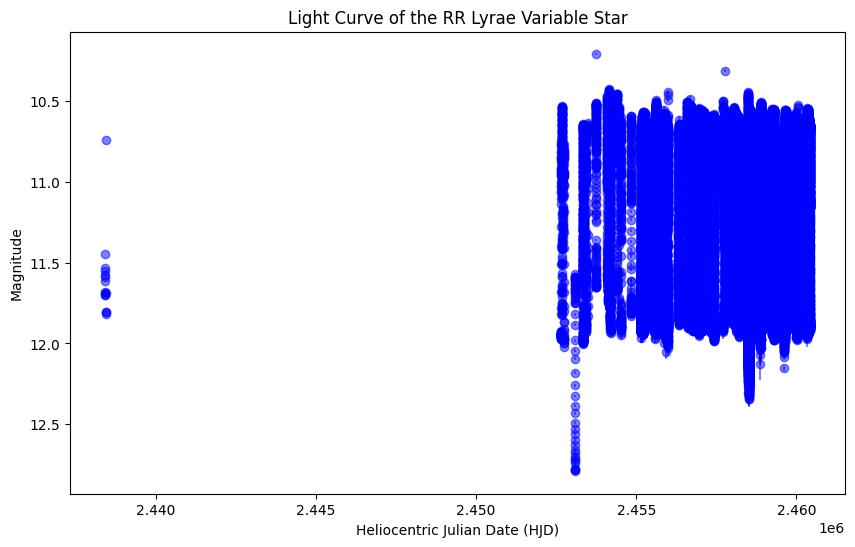

In [ ]:
# Plot the Light Curve
plt.figure(figsize=(10, 6))
plt.errorbar(data['JD'], data['Magnitude'], yerr=data['Uncertainty'], fmt='o', color='blue', alpha=0.5)
plt.xlabel('Heliocentric Julian Date (HJD)')
plt.ylabel('Magnitude')
plt.title('Light Curve of the RR Lyrae Variable Star')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from astropy.timeseries import LombScargle
import numpy as np


In [ ]:
# Calculate the Lomb-Scargle periodogram
frequency, power = LombScargle(data['JD'], data['Magnitude']).autopower()

In [ ]:
# Find the best frequency
best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency
print(f"Best period: {best_period} days")


Best period: 0.397284207978298 days


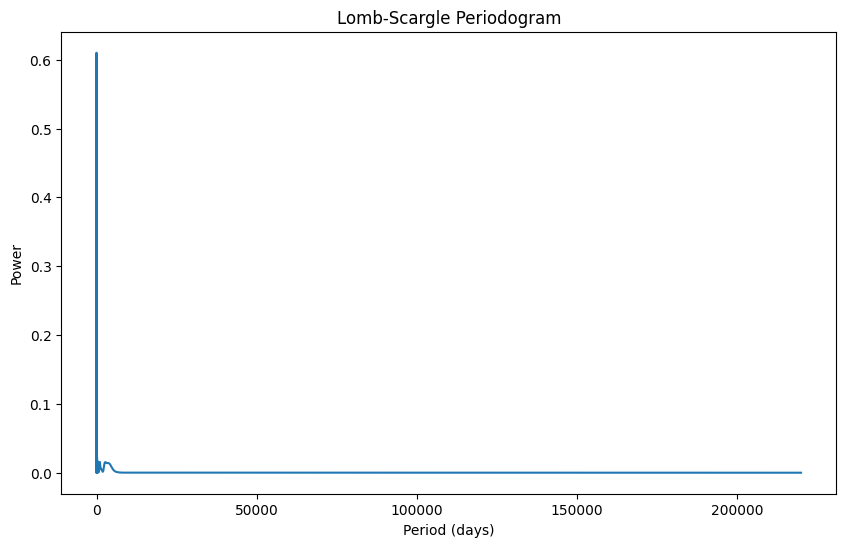

In [ ]:
# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(1/frequency, power)
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

In [ ]:
# Define the period range for RR Lyrae stars
min_period = 0.2  # days
max_period = 1.0  # days
min_frequency = 1 / max_period
max_frequency = 1 / min_period

In [ ]:
# Calculate the Lomb-Scargle periodogram within the restricted frequency range
frequency, power = LombScargle(data['JD'], data['Magnitude']).autopower(minimum_frequency=min_frequency, maximum_frequency=max_frequency)


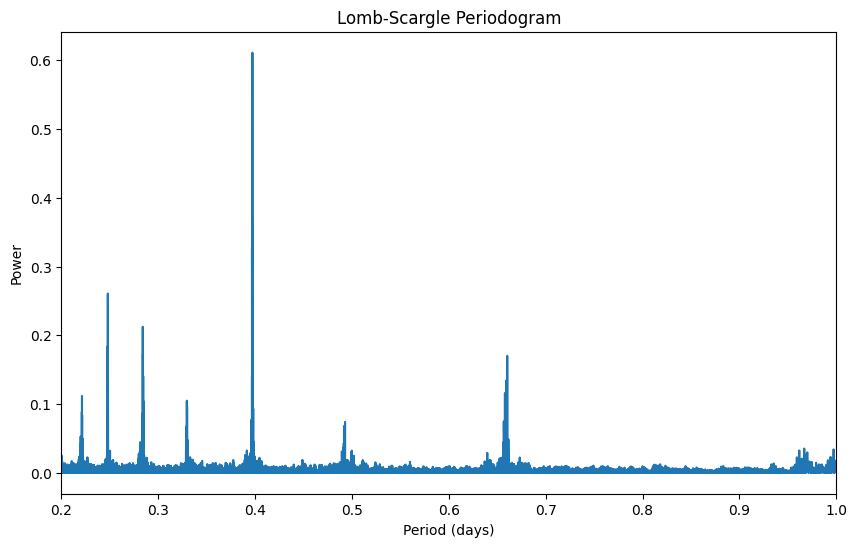

In [ ]:
# Plot the periodogram within the restricted range
plt.figure(figsize=(10, 6))
plt.plot(1/frequency, power)
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.xlim(min_period, max_period)
plt.show()

In [ ]:
# Find the best frequency within the restricted range
best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency
print(f"Best period: {best_period} days")

Best period: 0.39728535624957567 days


In [1]:
# Convert HJD to phase using the best period
data['phase'] = (data['JD'] % best_period) / best_period

NameError: name 'data' is not defined

In [2]:
# Sort by phase for a cleaner plot
data = data.sort_values('phase')

NameError: name 'data' is not defined

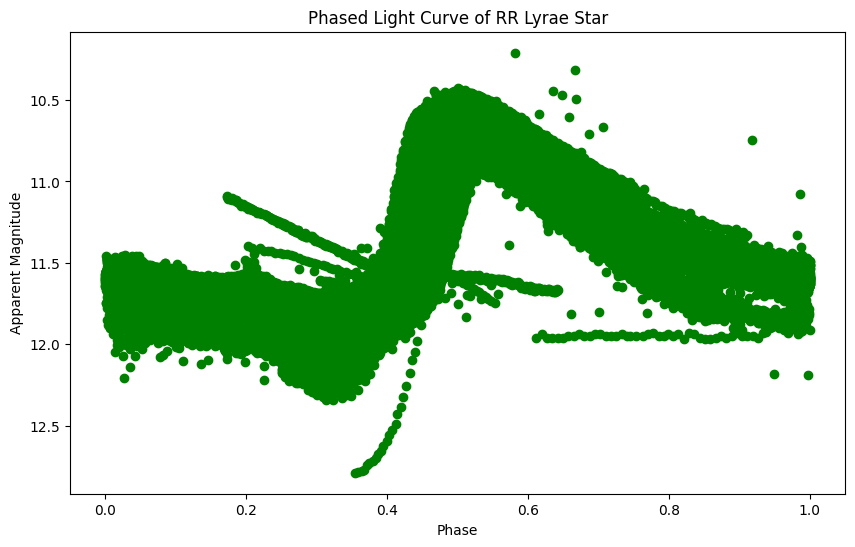

In [ ]:
# Plot the phased light curve
plt.figure(figsize=(10, 6))
plt.scatter(data['phase'], data['Magnitude'], color='')
plt.xlabel('Phase')plt.ylabel('Apparent Magnitude')
plt.gca().invert_yaxis()
plt.title('Phased Light Curve of RR Lyrae Star')
plt.show()

In [ ]:

# Find maxima and minima
max_magnitude = data['Magnitude'].max()
min_magnitude = data['Magnitude'].min()

# Calculate amplitude
amplitude = max_magnitude - min_magnitude
print(f"Maxima (Magnitude): {max_magnitude}")
print(f"Minima (Magnitude): {min_magnitude}")
print(f"Amplitude: {amplitude}")

Maxima (Magnitude): 12.79
Minima (Magnitude): 10.209
Amplitude: 2.5809999999999995


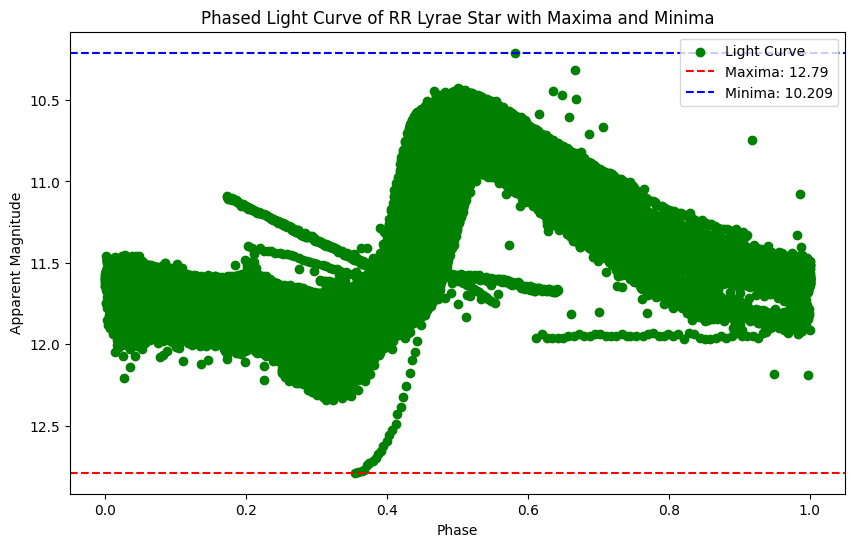

In [ ]:
# Plot the phased light curve with maxima and minima
plt.figure(figsize=(10, 6))
plt.scatter(data['phase'], data['Magnitude'], color='green', label='Light Curve')
plt.axhline(y=max_magnitude, color='red', linestyle='--', label=f'Maxima: {max_magnitude}')
plt.axhline(y=min_magnitude, color='blue', linestyle='--', label=f'Minima: {min_magnitude}')
plt.xlabel('Phase')
plt.ylabel('Apparent Magnitude')
plt.gca().invert_yaxis()
plt.title('Phased Light Curve of RR Lyrae Star with Maxima and Minima')
plt.legend()
plt.show()